In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



import warnings
warnings.filterwarnings('ignore')


#Evaluation des modèles
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

# 1. ANALYSE EXPLORATOIRE DES DONNEES

Nous disposons actuellement de six informations géométriques sur un
billet :

● length : la longueur du billet (en mm) ;

● height_left : la hauteur du billet (mesurée sur le côté gauche, en
mm) ;

● height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;

● margin_up : la marge entre le bord supérieur du billet et l'image de
celui-ci (en mm) ;

● margin_low : la marge entre le bord inférieur du billet et l'image de
celui-ci (en mm) ;

● diagonal : la diagonale du billet (en mm).


In [118]:
#Importation du fichier contenant les 1500 billets

billets = pd.read_csv("billets.csv", sep =';')
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [119]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [120]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [121]:
#Vérification des valeurs de la variable 'is_genuine'

print(billets["is_genuine"].unique())

[ True False]


In [122]:
# Vérification du nombre de Vrai et Faux billets

billets["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [123]:
# Valeur nulle

billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

  On observe qu'il y a 37 valeurs manquantes pour la variable "margin_low" .


  On traitera les valeurs manquantes ultérieurment.

  ------

In [124]:
billets.loc[billets["margin_low"].isna()].head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


## 1.1 DISPERSION DES DONNEES - HISTOGRAMMES

In [125]:
# Liste des noms des variables numériques dans le DataFrame
variables_numeriques = ["diagonal" ,'height_left', 'height_right','margin_low','margin_up','length']




def create_histplots(data, numeric_vars, color):
  # Variable qualitative à exclure des graphiques
  variable_qualitative = 'qualitative_var'

  # Calculer le nombre de lignes et de colonnes
  num_rows = 2
  num_cols = 3

  # Créer la figure et les sous-graphiques
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
  fig.suptitle('Histogrammes des variables numériques')

  # Boucle pour créer les histogrammes
  for i, variable in enumerate(variables_numeriques):
      # Exclure la variable qualitative
      if variable != variable_qualitative:
          # Calculer les indices de ligne et de colonne
          row = i // num_cols
          col = i % num_cols

          # Sélectionner le sous-graphique correspondant à l'indice
          ax = axes[row, col]

          # Tracer l'histogramme avec Seaborn
          sns.histplot(data=billets, x=variable, ax=ax , hue=color)
          ax.set_title(f'Histogramme de {variable}')

  # Supprimer les sous-graphiques vides
  for i in range(len(variables_numeriques), num_rows * num_cols):
      row = i // num_cols
      col = i % num_cols
      fig.delaxes(axes[row, col])

  # Ajuster les espacements entre les sous-graphiques
  fig.tight_layout()

  # Afficher la figure
  plt.show()

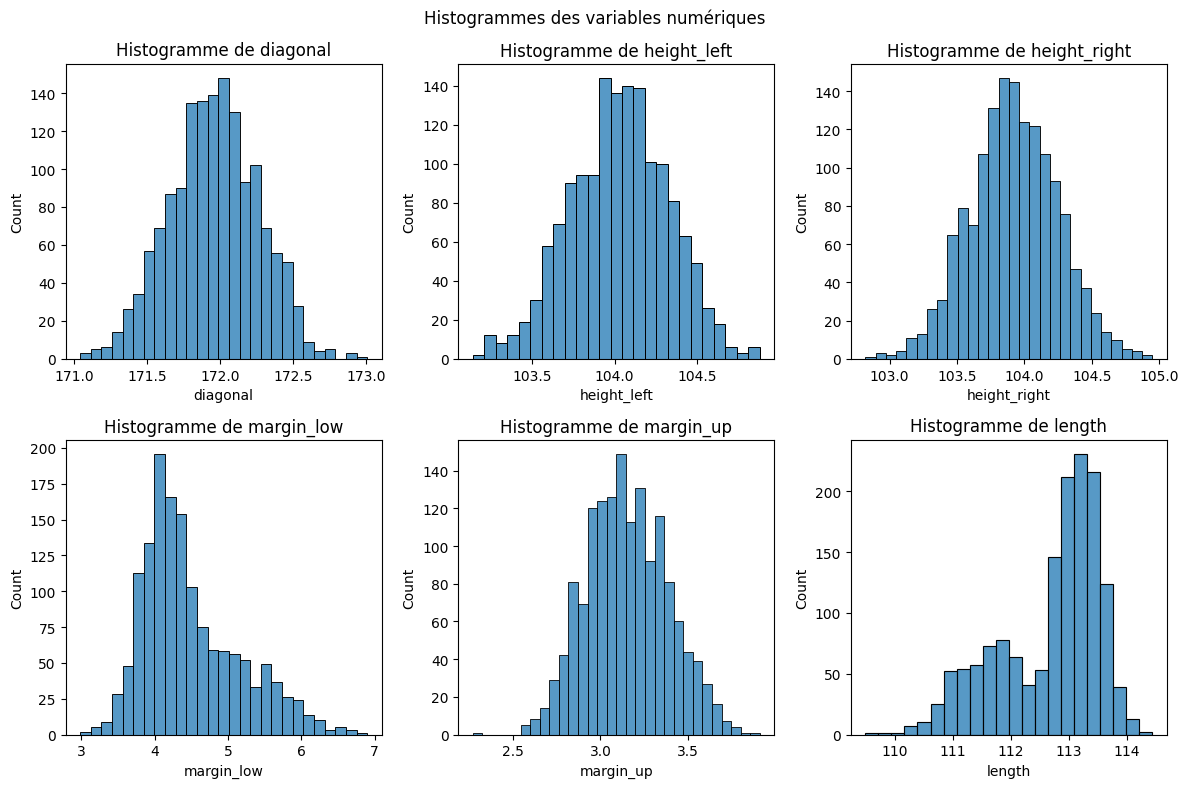

In [126]:
 create_histplots(billets, variables_numeriques , color = None)



> **On observe avec les histogrammes que la distibution des billets pour les variables diagonal, heigth_left, heigth_right et margin_up semblent suivre une loi normale.**

> **Tandis que les deux autres margin_low et legnth semblent étalées à droite et à gauche respectivement.**


> **Continuons l'analyse en mettant en ditinguant les vrais des faux billets.**


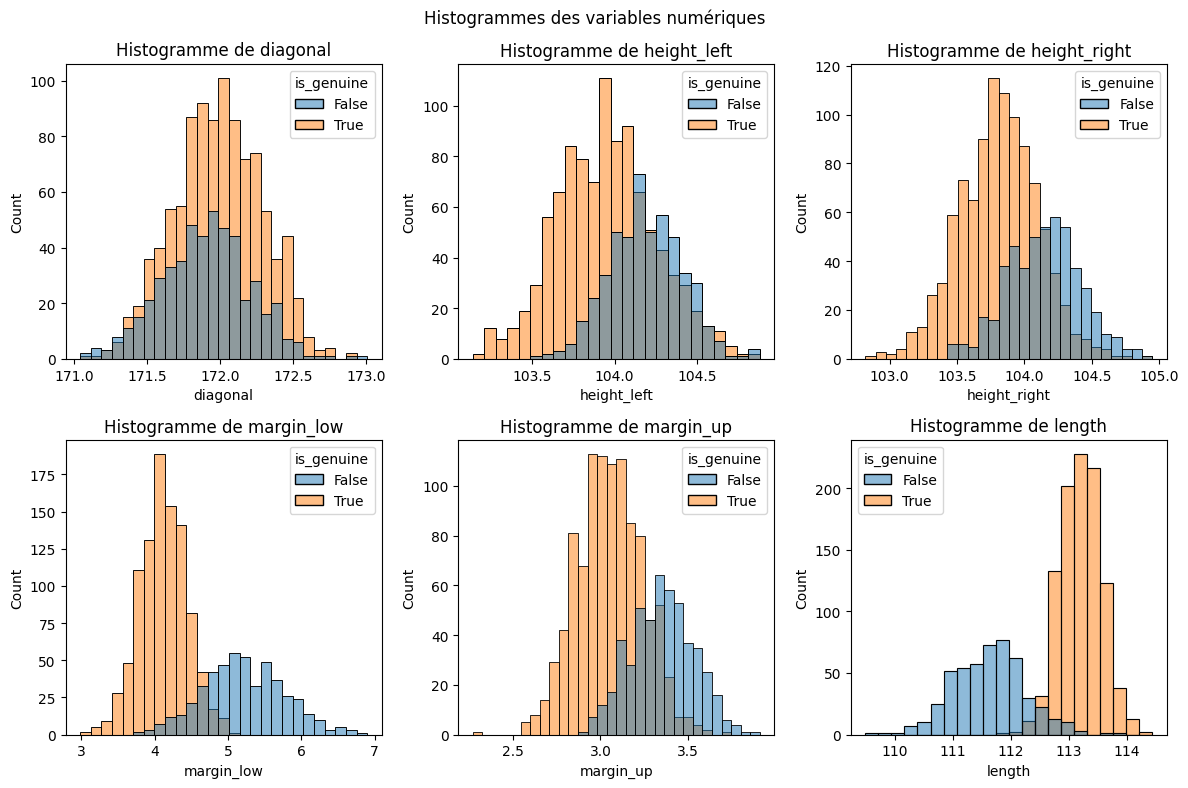

In [127]:
#On met en valeur les VRAIS et FAUX billets

create_histplots(billets, variables_numeriques, color = 'is_genuine')

> **On observe cette fois ci que les vriables des billets suivent un distrbution normale.**

-----------

## BOXPLOT

In [128]:
def create_boxplots(data, numeric_vars, color):
    num_rows = 2
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.suptitle('Boxplot des variables numériques')

    for i, variable in enumerate(numeric_vars):
            row = i // num_cols
            col = i % num_cols
            ax = axes[row, col]

            sns.boxplot(data=data, y=variable, ax=ax, orient="v" , x=color)
            ax.set_title(f'Boxplot de {variable}')

    for i in range(len(numeric_vars), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    fig.tight_layout()
    plt.show()

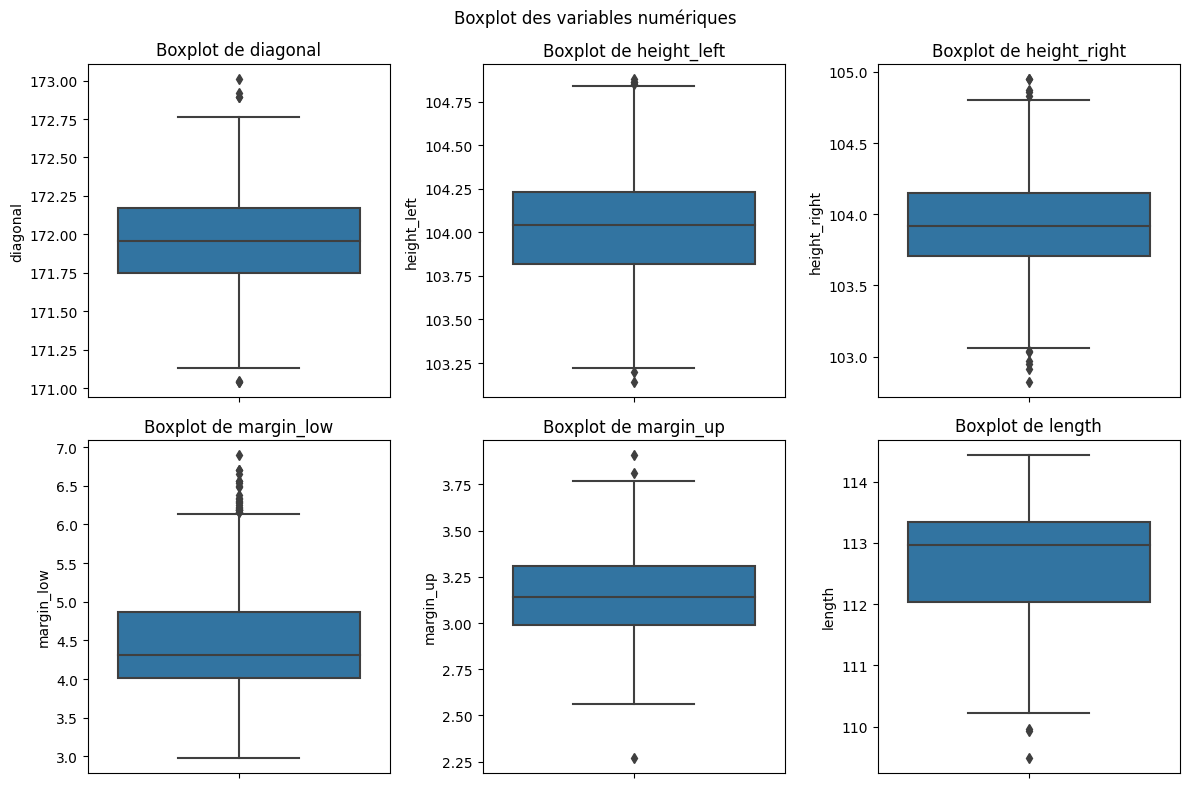

In [129]:
create_boxplots(billets,variables_numeriques,color=None)

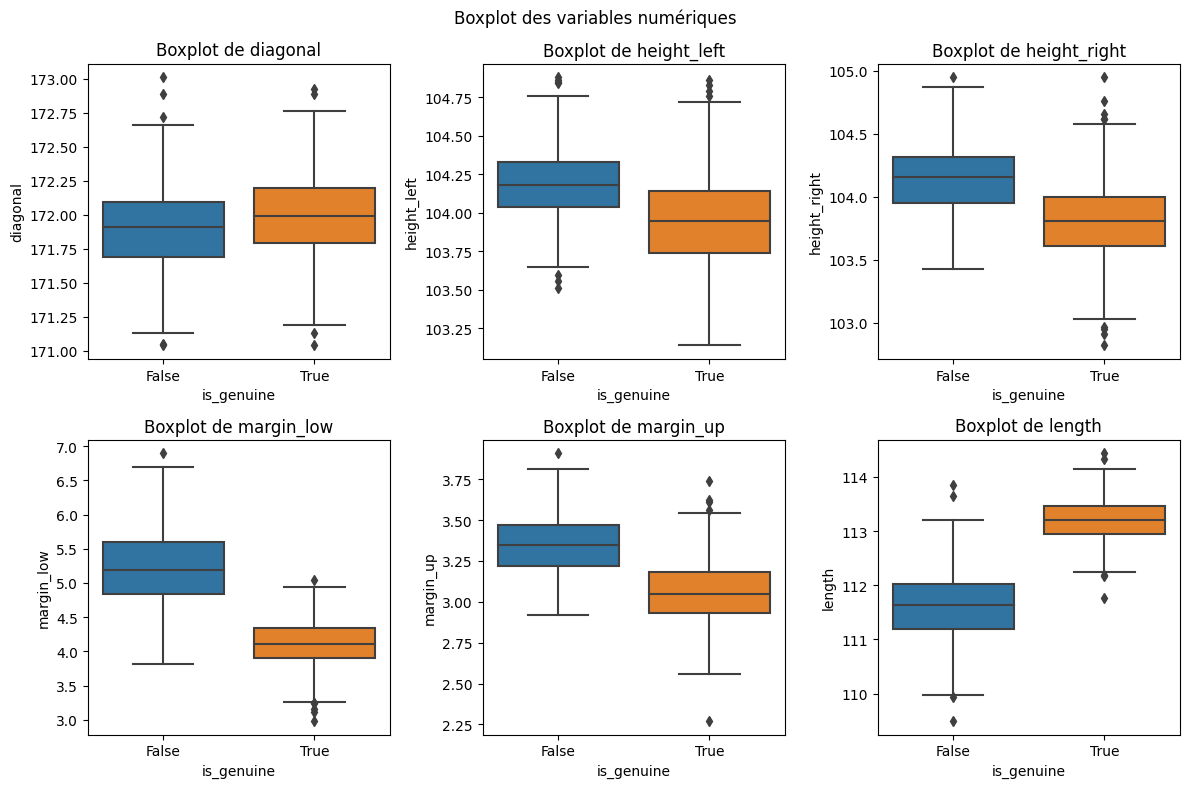

In [130]:
create_boxplots(billets, variables_numeriques, color ="is_genuine")

##BIVARIEE

 L'analyse bivariée des variables sert à examiner la relation entre deux variables dans un ensemble de données

### Pairplot

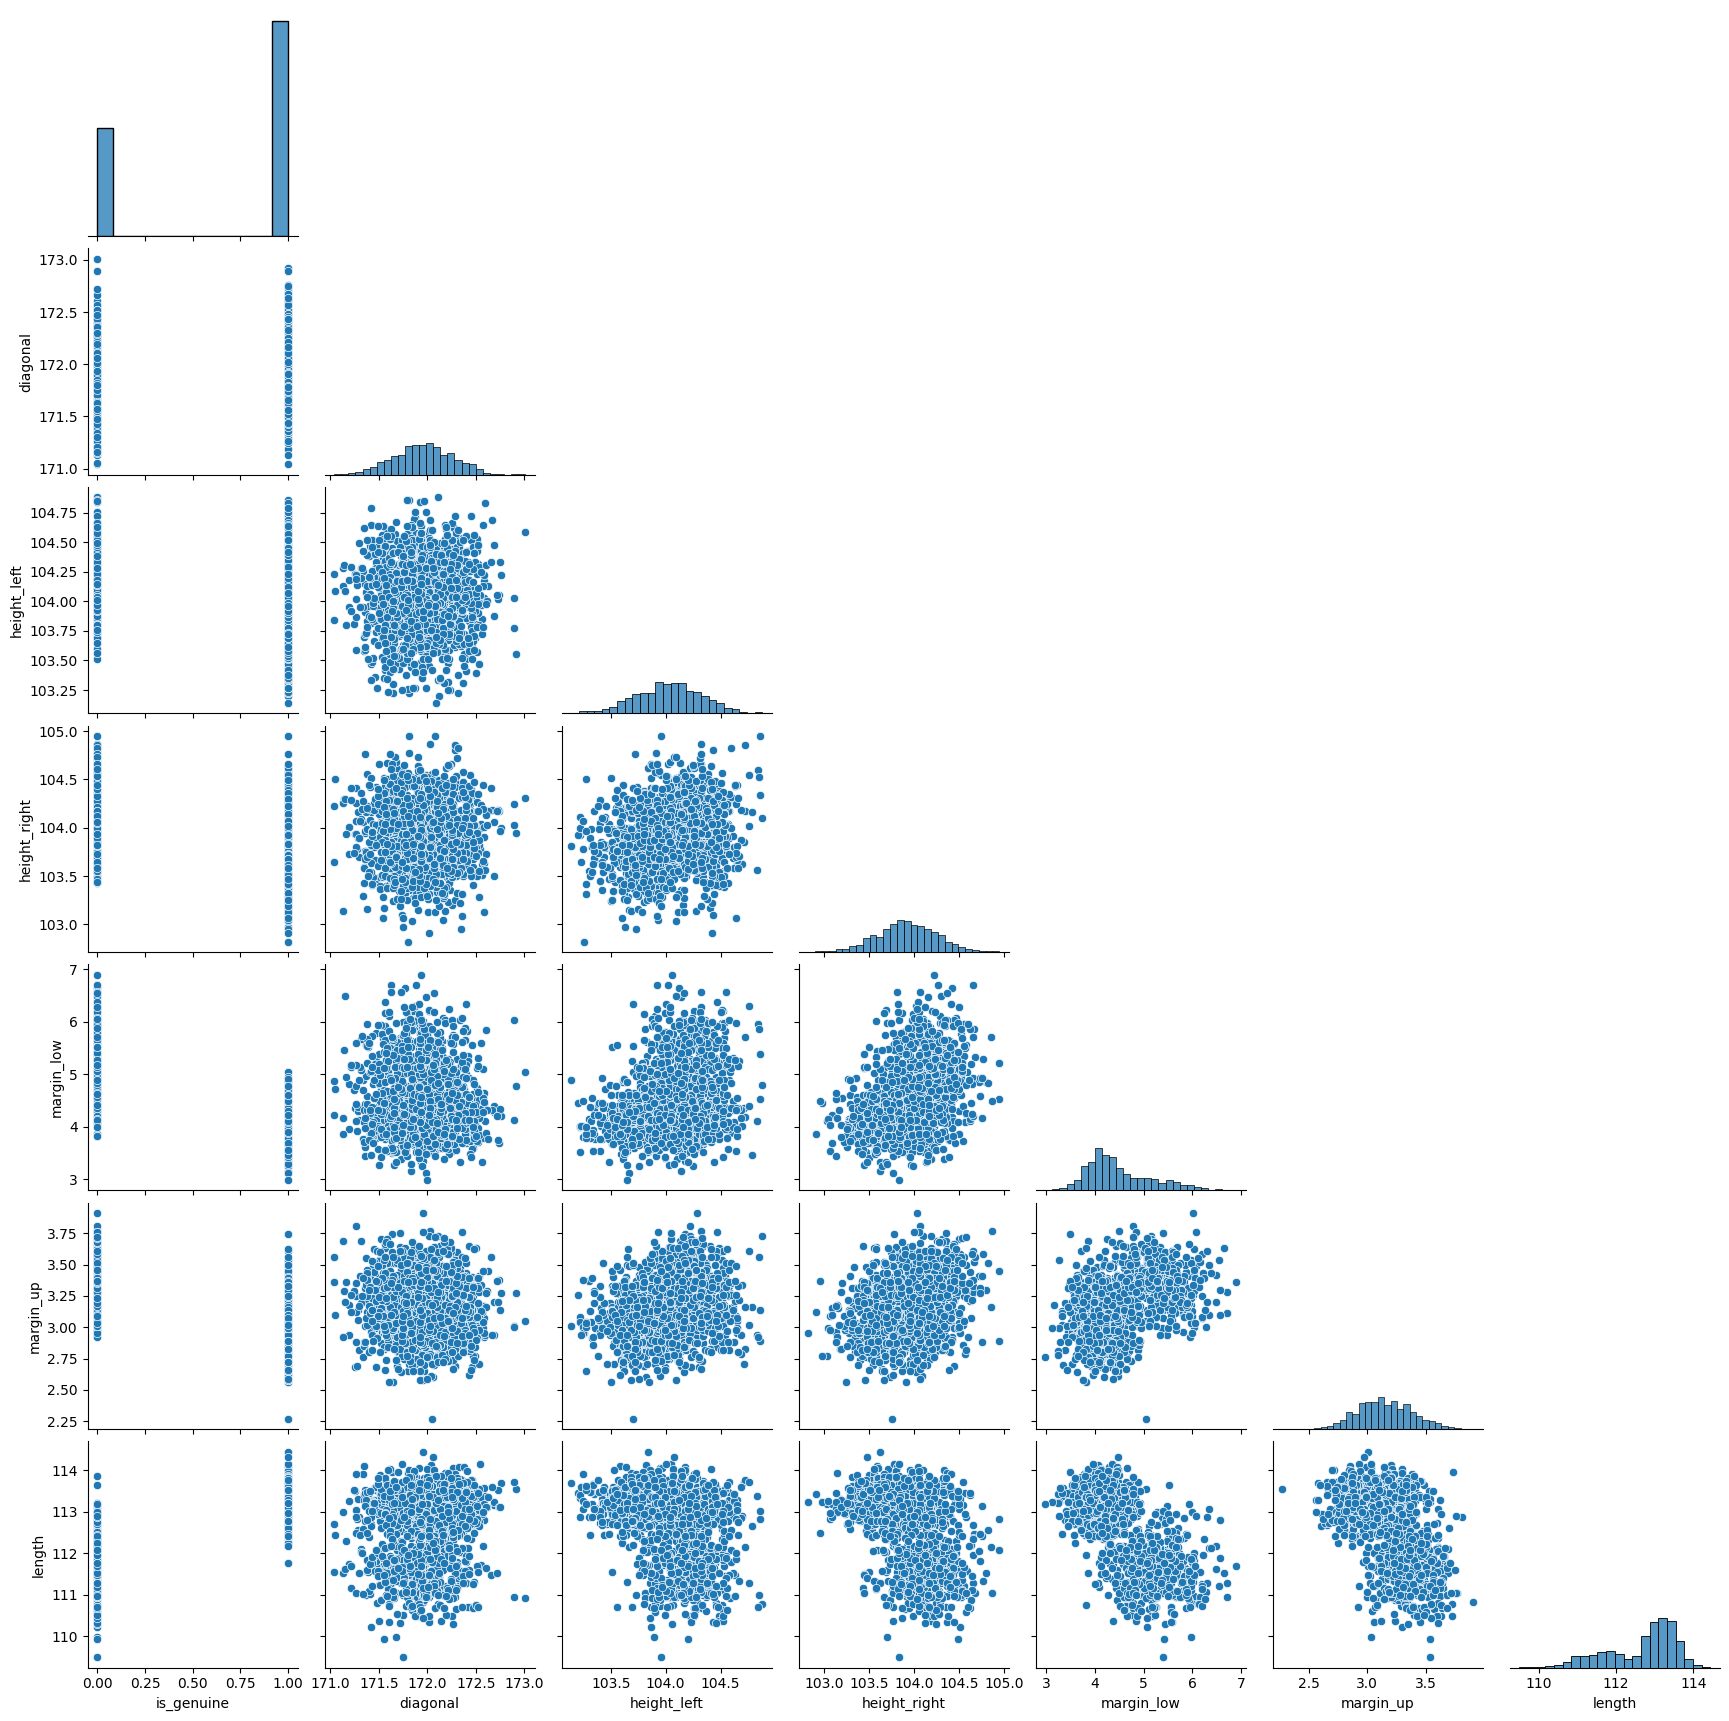

In [131]:
#Pairplot
sns.pairplot(data = billets, corner=True)

<Axes: xlabel='length', ylabel='margin_low'>

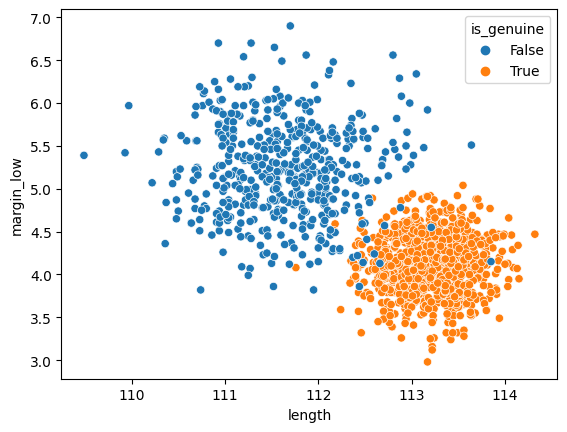

In [132]:
# Margin_low x lenght

sns.scatterplot(data = billets , y  = 'margin_low'  , x='length' , hue = 'is_genuine')

<Axes: xlabel='margin_low', ylabel='margin_up'>

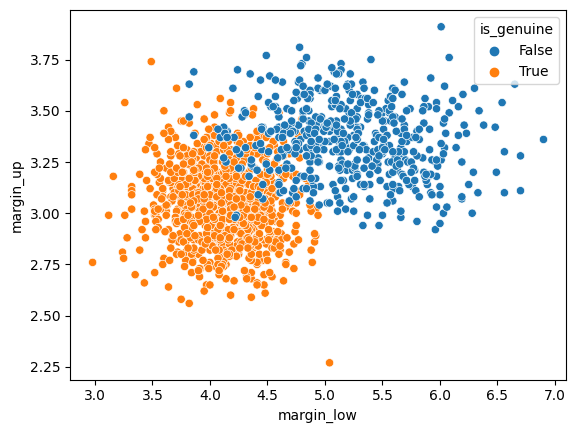

In [133]:
# Margin_low x margin_up

sns.scatterplot(data = billets , x = 'margin_low'  , y ='margin_up' , hue = 'is_genuine')

<Axes: xlabel='diagonal', ylabel='height_left'>

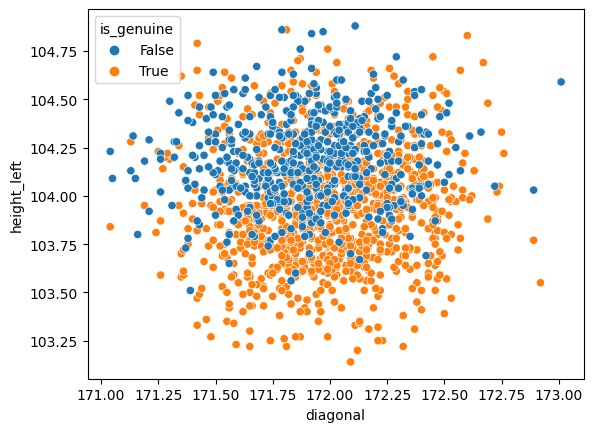

In [134]:
# Diagonal x height_left

sns.scatterplot(data = billets , x = 'diagonal'  , y ='height_left' , hue = 'is_genuine')

### Matrice de corrélation des variables

In [135]:
corr_p = billets.corr()
corr_p


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


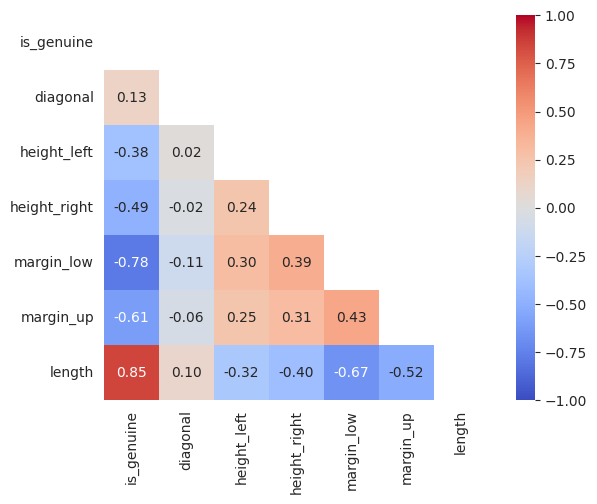

In [136]:
#pearson

mask = np.zeros_like(corr_p)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_p, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

In [137]:
# spearman

corr_s = billets.corr(method = 'spearman')
corr_s

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.129043,-0.395930,-0.492457,-0.752898,-0.609182,0.790311
diagonal,0.129043,1.000000,0.020055,-0.029748,-0.104360,-0.051097,0.096150
height_left,-0.395930,0.020055,1.000000,0.254122,0.297401,0.260195,-0.308700
height_right,-0.492457,-0.029748,0.254122,1.000000,0.396651,0.302853,-0.370605
margin_low,-0.752898,-0.104360,0.297401,0.396651,1.000000,0.421361,-0.587506
margin_up,-0.609182,-0.051097,0.260195,0.302853,0.421361,1.000000,-0.479832
length,0.790311,0.096150,-0.308700,-0.370605,-0.587506,-0.479832,1.000000


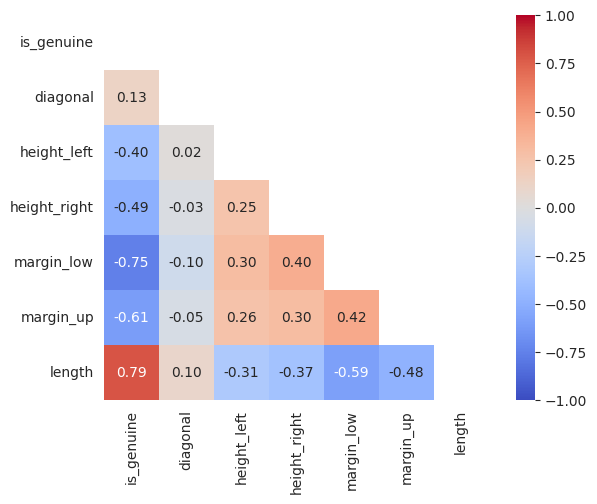

In [138]:
mask = np.zeros_like(corr_s)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_s, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# REGRESSION LINEAIRE- SIMPLE

### Suppression des valeurs  NAN

In [139]:
billets_wtna = billets.dropna()

X = billets_wtna[['length']]
y = billets_wtna['margin_low']



In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Obtenir les coefficients de régression
coefficients = model.coef_
intercept = model.intercept_

# Prédire les valeurs de var2 à partir de var1
predictions = model.predict(X)

a= coefficients
b=intercept
pred = predictions

# Afficher les résultats
print('Coefficients:', a)
print('Intercept:', b)
print('Predictions:', pred)

Coefficients: [-0.50685746]
Intercept: 61.59600862470534
Predictions: [4.40728129 4.27549835 4.24001833 ... 4.85331586 4.70125862 4.79249296]


In [141]:


model.score(X,y)

0.4445592708293492

In [142]:
r2_score(y, predictions)

0.4445592708293492

In [143]:
#Fonction linéaire qui permet de calculer margin_low

def predict_y(x, a, b):
    y = a * x + b
    return y


In [144]:

# Valeur de x pour la prédiction
x = 113

# Appeler la fonction pour prédire la valeur de y
predicted_y = predict_y(x, coefficients, intercept)

# Afficher la valeur prédite de y
print('Predicted y:', predicted_y)

Predicted y: [4.32111553]


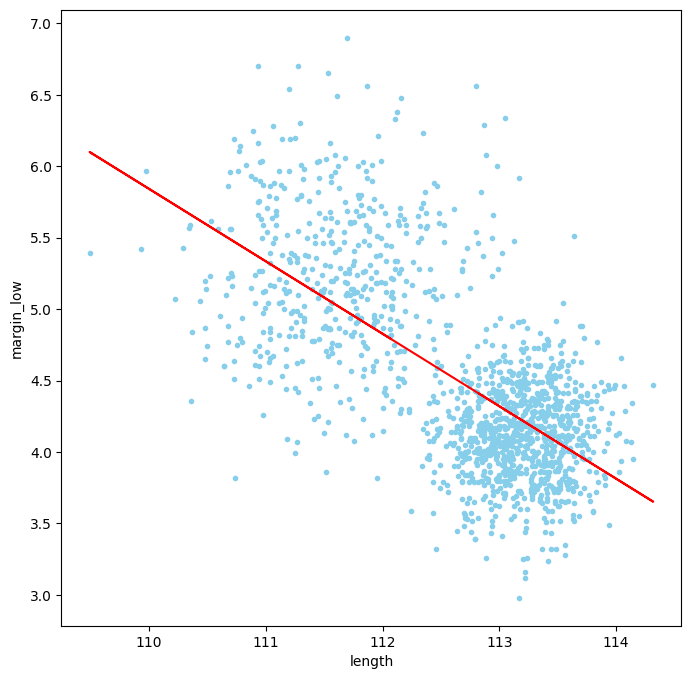

In [145]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("length")
ax.set_ylabel("margin_low")

_ = ax.scatter(billets_wtna.length, billets_wtna.margin_low, c="skyblue", marker=".", alpha=1)
_ = ax.plot(billets_wtna.length, pred, c="red")

In [146]:
residus = pred - y
residus.head()

0   -0.112719
1    0.505498
2   -0.159982
3    0.442618
4    0.514270
Name: margin_low, dtype: float64

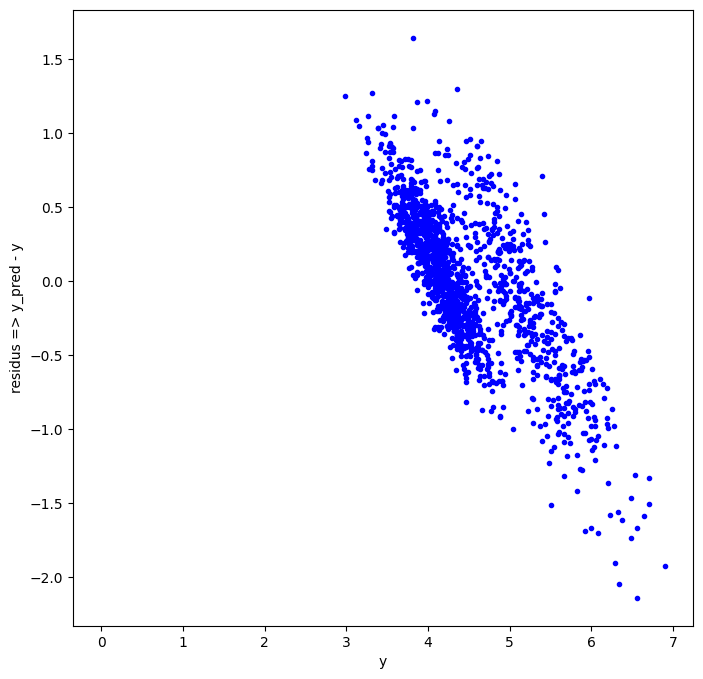

In [147]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("residus => y_pred - y")
_ = ax.scatter(y.values, residus.values, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 0], [0, 0], c="red")

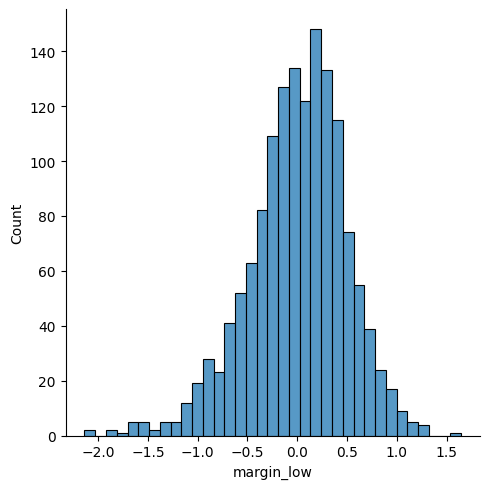

In [148]:
sns.displot(residus)

#SUPRESSION DES OUTLIERS

La regression linéaire methode sensible aux outliers

Methode des IQR

<Axes: ylabel='margin_low'>

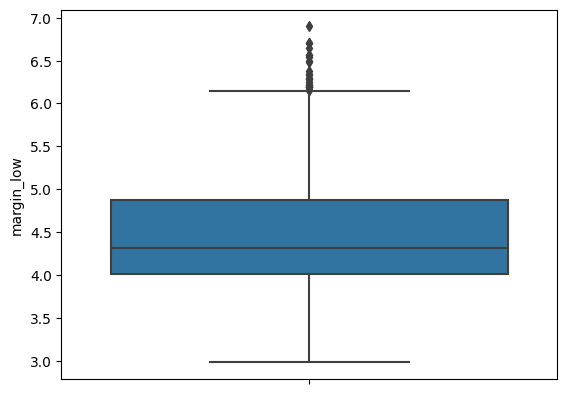

In [149]:
sns.boxplot(data = billets , y='margin_low')

In [150]:

q1 = billets["margin_low"].quantile(0.25)
q3 = billets["margin_low"].quantile(0.75)

IQR = q3 - q1

lower = q1 - 1.5 *IQR
upper = q3 + 1.5 *IQR

print(q1 , q3)
print(lower , upper)

billets_margin = billets[(billets['margin_low'] > lower) & (billets['margin_low'] < upper) ]
billets_margin

4.015 4.87
2.732499999999999 6.152500000000001


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [151]:

def outliers_iqr(data,variables):
  result = data.copy()

  for i, variable in enumerate(variables) :
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)

    iqr = q3 - q1

    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5

    result = result[(data[variable] >= lower) & (data[variable] <= upper)]

  return result

In [152]:
billets_wtouliers = outliers_iqr(billets,variables_numeriques)



In [153]:
billets_wtouliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 1 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1411 non-null   bool   
 1   diagonal      1411 non-null   float64
 2   height_left   1411 non-null   float64
 3   height_right  1411 non-null   float64
 4   margin_low    1411 non-null   float64
 5   margin_up     1411 non-null   float64
 6   length        1411 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 78.5 KB


In [154]:

X = billets_wtouliers[['length']]
y = billets_wtouliers['margin_low']


In [155]:
# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Obtenir les coefficients de régression
coefficients = model.coef_
intercept = model.intercept_

# Prédire les valeurs de var2 à partir de var1
predictions = model.predict(X)

a= coefficients
b=intercept
pred = predictions

# Afficher les résultats
print('Coefficients:', a)
print('Intercept:', b)
print('Predictions:', pred)

Coefficients: [-0.48372573]
Intercept: 58.96213461520323
Predictions: [4.2575918  4.223731   4.05442699 ... 4.80903913 4.66392141 4.75099204]


In [156]:
r2_score(y, predictions)

0.4461647611619084

## FILL NA

In [157]:
billets_fill = billets.copy()
billets_fill["margin_low"] = billets_fill["margin_low"].fillna(-0.4837 * billets['length'] + 58.96 )

billets_fill

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [158]:
billets_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


<Axes: xlabel='margin_low', ylabel='Count'>

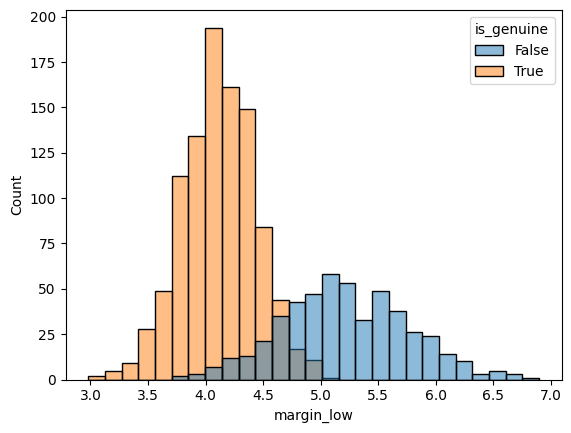

In [159]:


sns.histplot(data = billets_fill, x= 'margin_low', hue ="is_genuine")

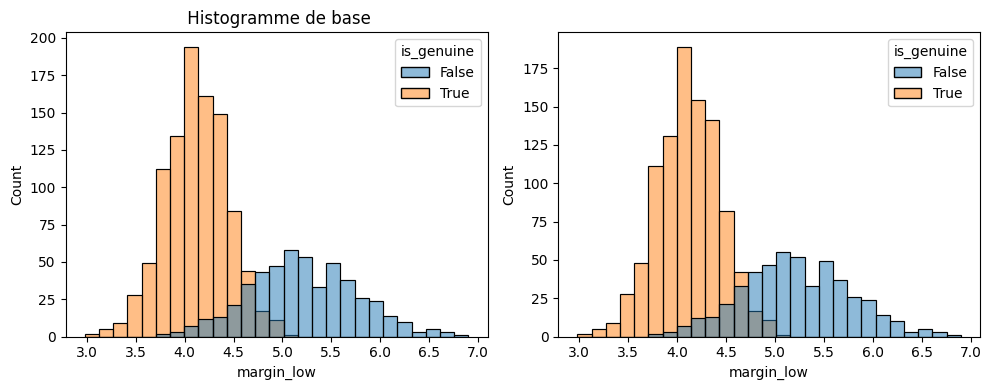

In [160]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Premier histogramme
sns.histplot(data = billets_fill, x= 'margin_low', hue ="is_genuine", ax=ax1)
ax1.set_title(' Histogramme FIll NA')

# Deuxième histogramme
# Premier histogramme
sns.histplot(data = billets, x= 'margin_low', hue ="is_genuine", ax=ax2)
ax1.set_title(' Histogramme de base')

# Affichage de la figure
plt.tight_layout()
plt.show()

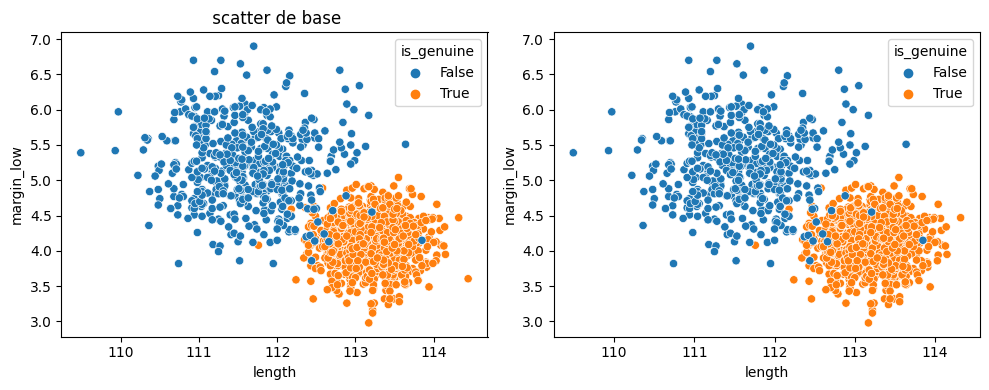

In [161]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Premier
sns.scatterplot(data = billets_fill , y  = 'margin_low'  , x='length' , hue = 'is_genuine', ax=ax1)
ax1.set_title(' scatter FIll NA')

# Deuxième
sns.scatterplot(data = billets , y  = 'margin_low'  , x='length' , hue = 'is_genuine', ax=ax2)
ax1.set_title(' scatter de base')

# Affichage de la figure
plt.tight_layout()
plt.show()


# REGRESSION LINEAIRE - MULTIPLE

Les variables :


X = variables explicatives

Y = variable expliqué

In [162]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [163]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_wtna).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          4.75e-299
Time:                        18:58:17   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [164]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_wtna).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          1.24e-304
Time:                        18:58:17   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Nous avons ici un R² ajusté égale à 0.616, la valeur est assez élevé.

En supprimant les variables non significatives pour le modèle le R² reste constant et le R² ajsuté augmente de 0.001.

Il est important de supprimer les variables non significative pour éviter le surajustement et la multicollinéarité.

In [165]:
# Affichage des coefficients de régression multiple
print("Les coefficients sont :", reg_multi.params)

Les coefficients sont : Intercept             5.926254
is_genuine[T.True]   -1.163200
margin_up            -0.211940
dtype: float64


##Colinéarité des variables

Vérifier l'absence de colinéarité significative entre les variables indépendantes en examinant les coefficients de corrélation ou en utilisant le facteur d'inflation de la variance (VIF).

- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated
- VIF greater than 5 = variables are highly correlated

In [166]:
# Test de la corrélation des variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007746]

Ici le VIF est compris entre en 1 et 5 et proche de 1, on peut en déduire une faible colinéarité des variables.

## RESIDUS

### Normalité des résidus

In [167]:
residuals = reg_multi.resid
residuals

0       0.369454
1      -0.359352
2       0.260051
3      -0.505114
4       0.014498
          ...   
1495   -0.851358
1496    0.057985
1497    0.295866
1498   -0.022940
1499   -0.582015
Length: 1463, dtype: float64

Text(0.5, 1.0, 'Distribution des résidus')

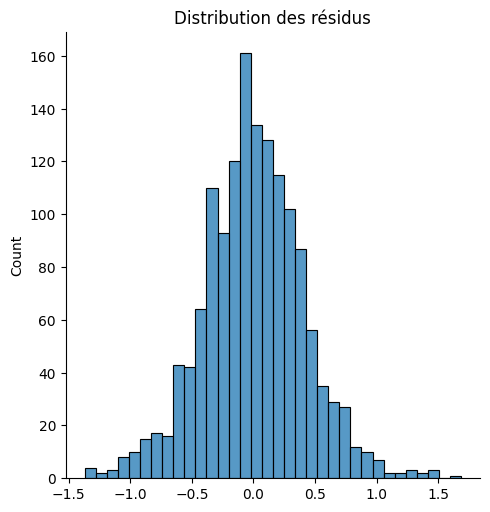

In [168]:
sns.displot(residuals)
plt.title('Distribution des résidus')


Les résidus sont distibués symétriquement autour de zéro et la distribution est en forme de cloche, loi normale.

La normalité des résidus est respectée.

###Homoscédasticité

In [169]:
#test de Breusch-Pagan
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']


test = sm.stats.diagnostic.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 163.45772873026883),
 ('p-value', 3.2033559115862154e-36),
 ('f-value', 91.82013129631356),
 ('f p-value', 2.745628359366743e-38)]

La p-value est inférieure à 5 %, on confirme l'hypothese nulle d'absence d'hétéroscedastciité. Et conclure qu'il y a des preuves d'hétéroscedasticité dans les résidus.

### Test de corrélation entre les résidus

L'interprétation des résultats du test de Durbin-Watson dépend de la valeur obtenue. Si la statistique de Durbin-Watson est proche de 2, cela suggère une absence d'autocorrélation des résidus.

In [170]:
#Test de durbin watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Statistique de Durbin-Watson :", durbin_watson_statistic)

Statistique de Durbin-Watson : 2.0410819121411503


L'interprétation des résultats du test de Durbin-Watson dépend de la valeur obtenue. Si la statistique de Durbin-Watson est proche de 2, cela suggère une absence d'autocorrélation des résidus.

### Leviers

In [171]:
n = billets_wtna.shape[0]
p = 2

In [172]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

In [173]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

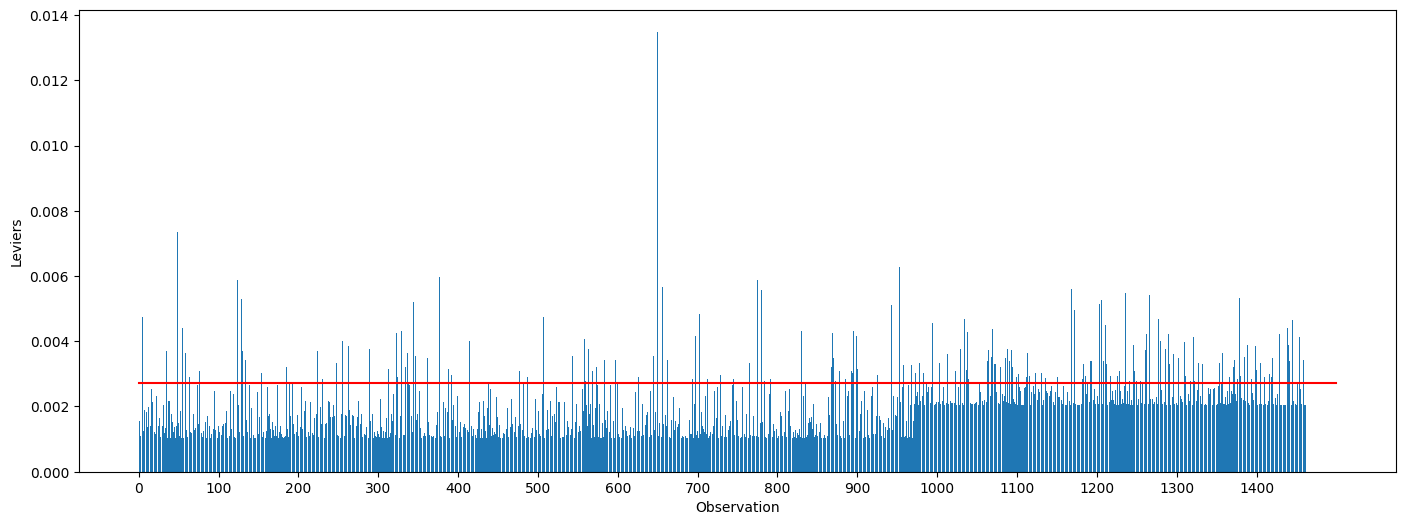

In [174]:
plt.figure(figsize=(17,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

In [175]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
13,14,0.003212
34,35,0.003704
48,49,0.007353
52,53,0.010647
...,...,...
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796
1453,1454,0.004136


### Distance de Cook

In [176]:
influence = reg_multi.get_influence().summary_frame()

In [177]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

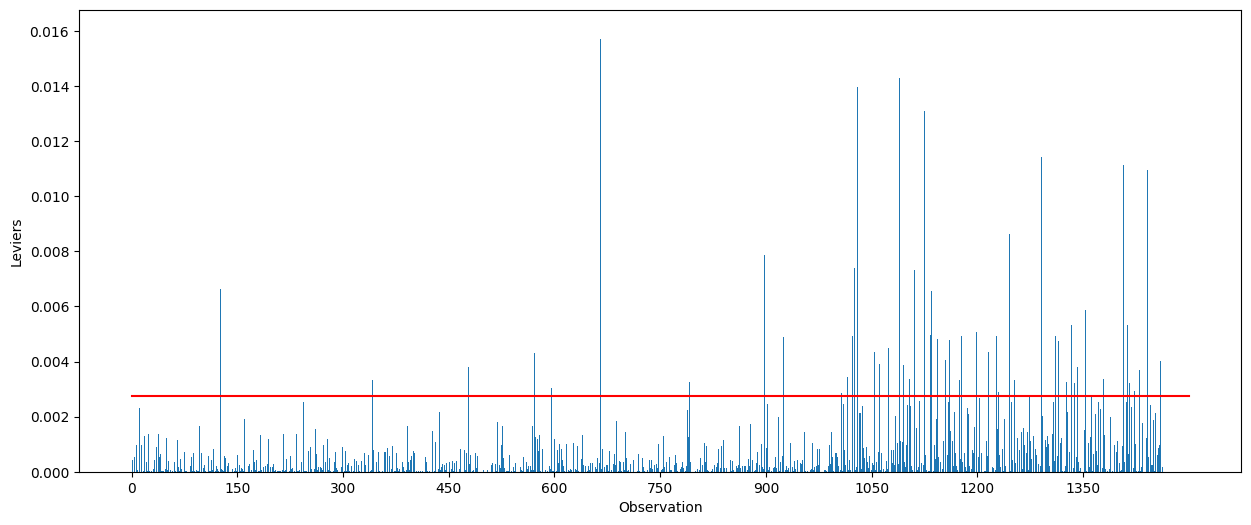

In [178]:
plt.figure(figsize=(15,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1500, step=150))
plt.title("")
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [179]:
dfsuppr = analyses.loc[analyses['dcooks'] > seuil_dcook, :]
dfsuppr

,obs,levier,dcooks
52,53,0.010647,0.004945
125,126,0.001204,0.006626
239,240,0.001671,0.005198
341,342,0.001708,0.003332
354,355,0.001204,0.004993
...,...,...,...
1426,1427,0.004228,0.005707
1429,1430,0.002053,0.003686
1441,1442,0.005428,0.010969
1450,1451,0.002703,0.004051


# REGRESSION LINEAIRE MULTIPLE - SANS LES VALEURS INFLUENTES

In [180]:
billets_wtna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [181]:
billets_wtna2 = billets_wtna.copy()

billets_wtna2.drop(dfsuppr.index, inplace=True)
billets_wtna2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1370 non-null   bool   
 1   diagonal      1370 non-null   float64
 2   height_left   1370 non-null   float64
 3   height_right  1370 non-null   float64
 4   margin_low    1370 non-null   float64
 5   margin_up     1370 non-null   float64
 6   length        1370 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 76.3 KB


regressions multiple

In [182]:
reg_multi2 = smf.ols('margin_low~is_genuine+margin_up', data=billets_wtna2).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1458.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:58:24   Log-Likelihood:                -471.02
No. Observations:                1370   AIC:                             948.0
Df Residuals:                    1367   BIC:                             963.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.8887      0

On observe ici un R2 plus grand que pour la regression linéaire multiple avec les valeurs atypique, qui on une deictance de COok au dessus du seuil.

In [183]:
# Affichage des coefficients de régression multiple
print("Les coefficients sont :", reg_multi2.params)

Les coefficients sont : Intercept             5.888654
is_genuine[T.True]   -1.144164
margin_up            -0.204635
dtype: float64


## ON COMPLETE LES VALEURS MANQUANTES - FILL NA


In [184]:
# On recupere
billets_nan = billets.loc[billets['margin_low'].isna() ]
billets_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [185]:
# On calcul les predictions selon le modele

predictions_marginlow = reg_multi2.predict(billets_nan)
len(predictions_marginlow)


37

In [186]:
predictions_marginlow.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 72 to 1438
Series name: None
Non-Null Count  Dtype  
--------------  -----  
37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes


In [187]:
billets_pred = billets.copy()
billets_pred['margin_low'].fillna(predictions_marginlow, inplace=True)

billets_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [188]:
billets_pred['margin_low'].describe()


count    1500.000000
mean        4.482860
std         0.659725
min         2.980000
25%         4.027500
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

In [189]:
billets['margin_low'].describe()

count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

<Axes: xlabel='margin_low', ylabel='Count'>

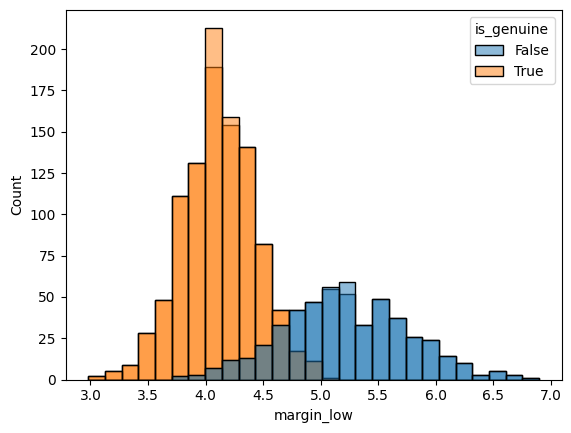

In [190]:

sns.histplot(data =billets, x ='margin_low', hue='is_genuine')
sns.histplot(data =billets_pred, x ='margin_low', hue='is_genuine')

In [191]:
billets_test = pd.read_csv("billets_production.csv")

# BASELINE MODEL

A partir de nos observations on peut créer un modèle simple pour derterminer si un billet est un vrai ou un faux .

<Axes: xlabel='length', ylabel='margin_low'>

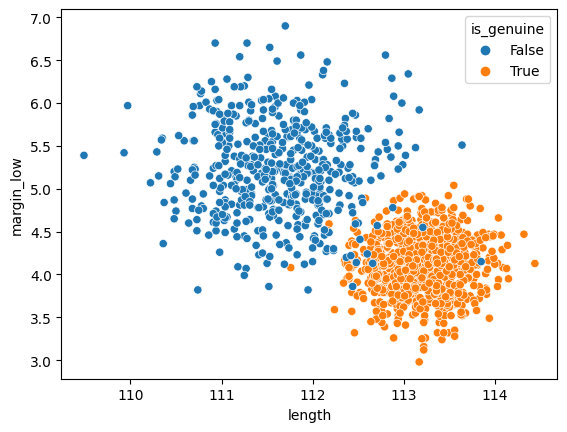

In [192]:
sns.scatterplot(data = billets_pred , y  = 'margin_low'  , x='length' , hue = 'is_genuine')


On peut créer un modele simple pour déterminer si un billet est un vrai ou un faux à partir de ce graphique qui représente les billets, précisement la longueur des billets en fonctions de la marge inférieure.

Les billets avec une longueur supérieur à 112.5 mm et une marge infériereure à 5.00 mm peuvent être considéré comme des vrais billets et les autres comme des faux billets.

In [193]:
def check_validity(row):
    if row['length'] > 112.5 and row['margin_low'] < 5.00:
        return True
    else:
        return False


In [194]:
# Ajout de la colonne "Validité" en utilisant la fonction check_validity
billets_baseline = billets_pred.copy()
billets_baseline['Validité'] = billets_baseline.apply(check_validity, axis=1)

# Affichage du dataframe résultant
billets_baseline

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Validité
0,True,171.81,104.86,104.95,4.52,2.89,112.83,True
1,True,171.46,103.36,103.66,3.77,2.99,113.09,True
2,True,172.69,104.48,103.50,4.40,2.94,113.16,True
3,True,171.36,103.91,103.94,3.62,3.01,113.51,True
4,True,171.73,104.28,103.46,4.04,3.48,112.54,True
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,False
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,False
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,False
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,False


## Evaluation du modele - Metrics

- precision = minimisation des faux positifs

- Recall = minimisation des faux négatifs


- Accuracy = évaluation global du modele

- Le F1-score est une mesure qui équilibre la précision et le rappel

In [195]:
# Fonction pour calculer les scores d'un modele donné et les mettre dans un data frame

scores_df = pd.DataFrame({'Score': ['Accuracy', 'Precision', 'Recall', 'F1 Score']})

def calculate_scores(y_true, y_pred, model):
    accuracy = round(accuracy_score(y_true, y_pred),4)
    precision = round(precision_score(y_true, y_pred),4)
    recall = round(recall_score(y_true, y_pred),4)
    f1 = round(f1_score(y_true, y_pred),4)
    valeurs_scores = [accuracy,precision,recall,f1]

    scores_df[model] = valeurs_scores

    return accuracy, precision, recall, f1, scores_df

In [196]:
accuracy, precision, recall, f1, scores_df =  calculate_scores(billets_baseline["is_genuine"], billets_baseline["Validité"]," base_line")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(scores_df)

Accuracy: 0.9727
Precision: 0.9908
Recall: 0.968
F1 Score: 0.9793
       Score   base_line
0   Accuracy      0.9727
1  Precision      0.9908
2     Recall      0.9680
3   F1 Score      0.9793


In [197]:
scores_df = pd.DataFrame({'Score': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                          'Base model': [accuracy, precision, recall, f1]})

In [198]:
scores_df

,Score,Base model
0,Accuracy,0.9727
1,Precision,0.9908
2,Recall,0.9680
3,F1 Score,0.9793


# ACP - KMEANS

La méthode des K-means est un méthode non supervisés qui permet de regrouper les individus en différents groupes selon leurs ressemblances.

## ACP

In [199]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Données d'entraînement
X  = billets_pred.drop(columns = "is_genuine")

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [200]:
# Création de l'objet PCA
pca = PCA(n_components = 6)  # Nombre de composantes principales souhaitées

# Ajustement et transformation des données
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
print("Pourcentage de variance expliquée :", pca.explained_variance_ratio_)

Pourcentage de variance expliquée : [0.43203677 0.16957204 0.13020224 0.11825281 0.09666509 0.05327105]


In [201]:
scree = (pca.explained_variance_ratio_*100).round(1)
scree

array([43.2, 17. , 13. , 11.8,  9.7,  5.3])

In [202]:
# Variance expliquée cumulées
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [203]:
X_list = range(1, 6+1)


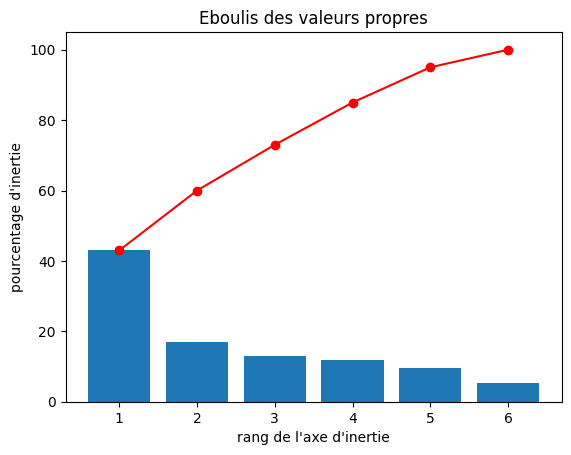

In [204]:
# Graphique des Eboulis des valeurs propres et cumul

plt.bar(X_list, scree)
plt.plot(X_list, scree_cum, c="red" ,marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [205]:
X_proj = pca.transform(X_scaled)

# Sous forme de data frame
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", 'F3','F4',"F5","F6"])
X_proj[:10]

,F1,F2,F3,F4,F5,F6
0,1.647162,0.747391,2.396208,3.184795,0.297437,-0.008492
1,-2.019804,-2.206758,-1.002206,0.072328,0.038720,-0.475858
2,-0.969057,2.619314,1.200029,-0.924542,-0.837175,0.196429
3,-1.375863,-1.817577,0.648215,0.831925,0.802591,-0.224440
4,0.150354,-0.566131,0.853536,-1.782927,1.187761,-0.291439
5,-0.695871,0.426962,-0.867761,0.820356,-0.584666,-0.101209
6,0.176220,1.302686,0.001344,-0.533834,0.149034,0.303094
7,-1.151208,-0.382749,-0.382808,1.088059,-0.084414,-0.314650
8,-0.854071,1.443624,-0.685095,-0.907872,0.366243,-0.225482
9,-0.596790,1.743431,-0.323225,0.116629,0.840377,0.342280


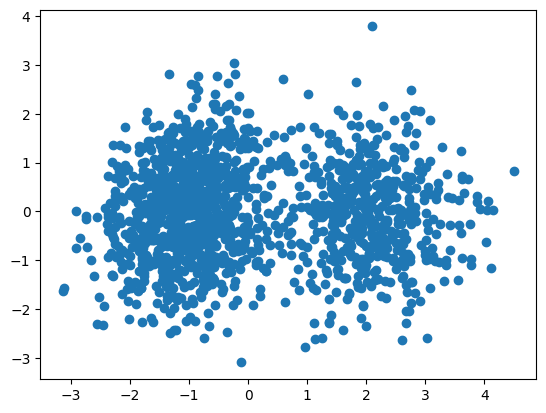

In [206]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1])
plt.show(block=False)

In [207]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.09, labels[i], fontsize='10', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [208]:
#Cercle de coorélation

def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y =  x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.04,
                head_length=0.05,
                width=0.006, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])


    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))


    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

### Cercle de corrélation

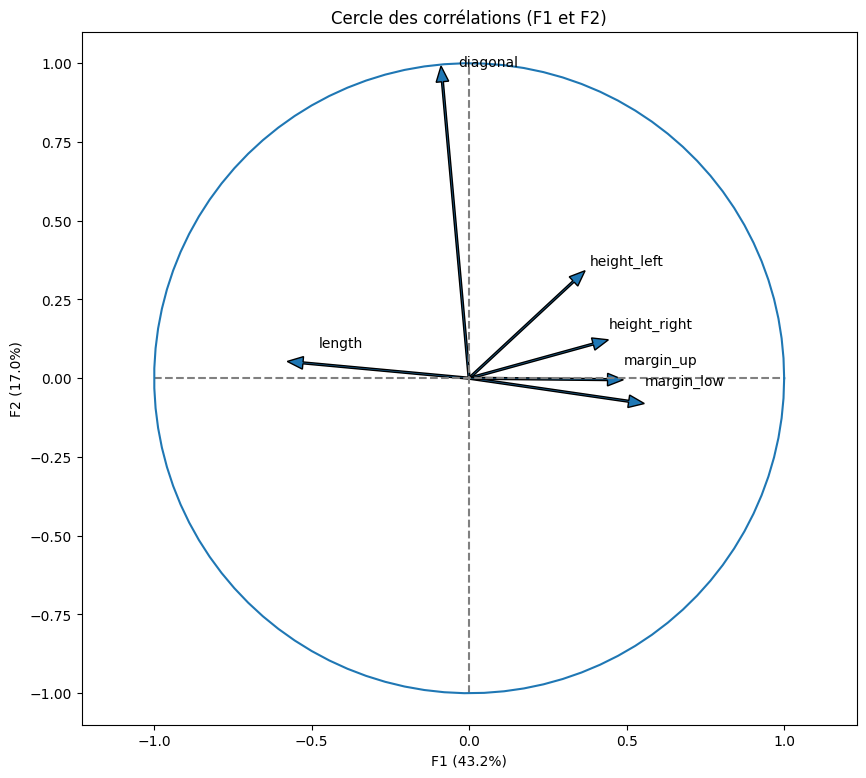

In [209]:
# Projection des varaibles Dans l'espace F1 F2

x_y = (0,1)
features =  X.columns
correlation_graph(pca,  x_y, features)

Nous observons l'anticorrélation des variables length / margin_low, que l'on pouvait observer dans la matrice de corrélation des variables.

### Projection des individus

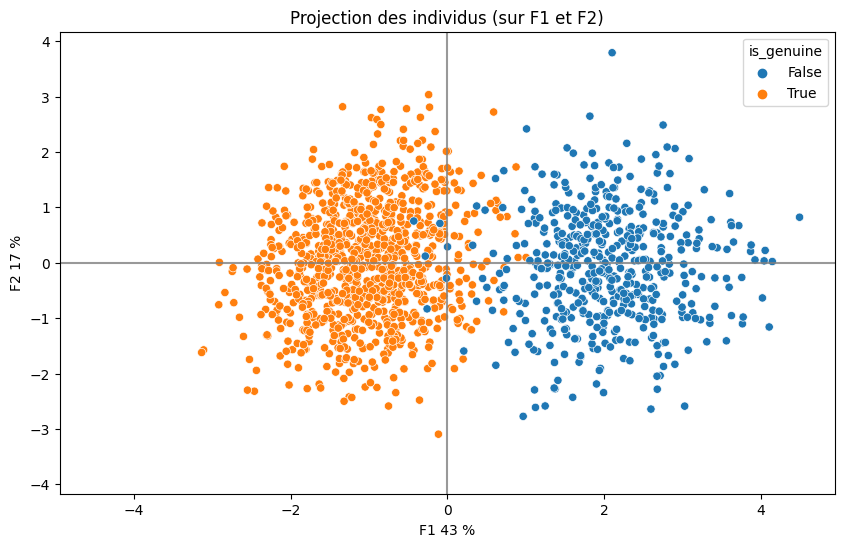

In [210]:
# Projection des individus Dans l'espace F1 F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,6), clusters=billets_pred['is_genuine'], marker="o")

# K-MEANS

In [211]:
from sklearn.cluster import KMeans

In [212]:
# Une liste vide pour enregistrer les inerties :
intertia_list = [ ]

# Notre liste de nombres de clusters :
k_list = range(1, 15)

# Pour chaque nombre de clusters :
for k in k_list :

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)

    # On entraine
    kmeans.fit(X_scaled)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

Nous pouvons conforter le fait qu'il ne doit y avoir que 2 clusters, pour les vrais et faux billets.

En utilisant les méthodes de determination des clusters, on espère avoir un nombre de cluster optimal être égal à 2.

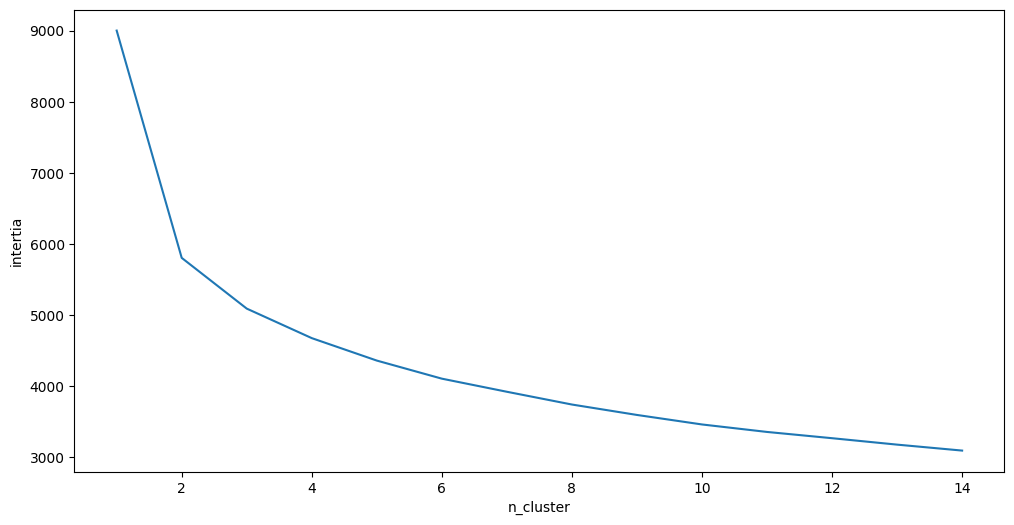

In [213]:
# Graph

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

Ici nous observons bien un coude pour 2 clusters.

Cela correspond a ce que nous attendons, deux groupes, pour les vrais et faux billets.

### Calculs des clusters

In [214]:
kmeans = KMeans(n_clusters=2)

In [215]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [216]:
# Calcul de cluster et assignement
cluster_k = kmeans.labels_
cluster_k

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [217]:
np.unique(cluster_k, return_counts = True)

(array([0, 1], dtype=int32), array([1004,  496]))

In [218]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.09600039, -0.28194592, -0.35241933, -0.55331956, -0.42692359,
         0.59324013],
       [-0.19432338,  0.57071311,  0.71336493,  1.12002588,  0.86417597,
        -1.20083284]])

In [219]:
#Centroides
centroids_scaled = pca.transform(centroids)
centroids_scaled

array([[-1.02117353,  0.03673008,  0.04511864,  0.04275436,  0.06867068,
         0.02335205],
       [ 2.06705288, -0.07434879, -0.09132886, -0.0865431 , -0.13900276,
        -0.04726907]])

### Projection des individus / clusters

Projection des individus selon les cluters

In [220]:
centroids_proj = pd.DataFrame(centroids_scaled,
                              columns = ["F1", "F2", "F3", "F4", "F5", "F6"],
                              index=["cluster_0", "cluster_1"])

centroids_proj

,F1,F2,F3,F4,F5,F6
cluster_0,-1.021174,0.036730,0.045119,0.042754,0.068671,0.023352
cluster_1,2.067053,-0.074349,-0.091329,-0.086543,-0.139003,-0.047269


In [221]:
# Les centroides avec les axes F1 F2 poru la représentation graphique
X_proj_kmeans = pd.DataFrame(X_proj, columns =['F1' , "F2"])
X_proj_kmeans["cluster"] = cluster_k
X_proj_kmeans

,F1,F2,cluster
0,1.647162,0.747391,1
1,-2.019804,-2.206758,0
2,-0.969057,2.619314,0
3,-1.375863,-1.817577,0
4,0.150354,-0.566131,0
...,...,...,...
1495,1.428766,-0.269935,1
1496,3.280898,1.317288,1
1497,1.888833,-0.600901,1
1498,1.789788,0.510970,1


<Axes: title={'center': 'Projection des individus (clusters K-means)'}, xlabel='F1 (43.2%)', ylabel='F2 (17.0%)'>

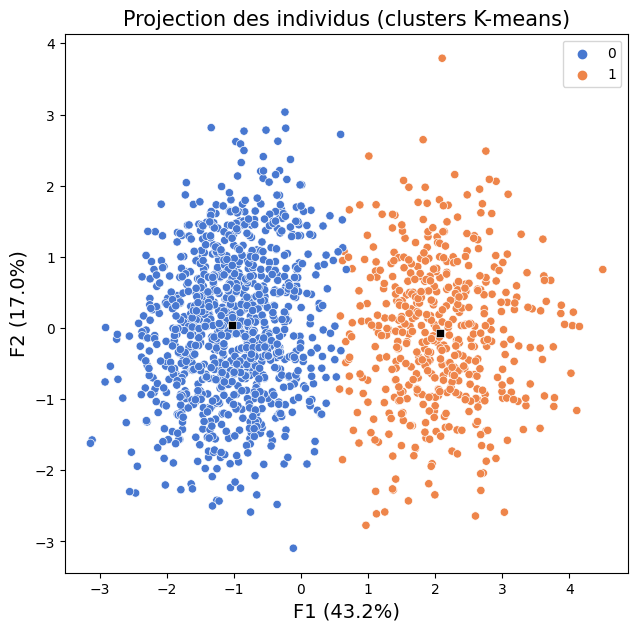

In [222]:
#Projections avec les clusters du K-means
plt.figure(figsize=(16,7))
plt.subplot(122)
plt.title("Projection des individus (clusters K-means)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)



sns.scatterplot(data= X_proj_kmeans, x="F1", y="F2", hue="cluster", palette="muted") # Nuage des individus
sns.scatterplot(data= centroids_proj, x="F1", y="F2", marker="s", color="black", s=33) # On affiche les centroïdes

In [272]:
labels = kmeans.labels_
labels

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [224]:
billets_kmeans = billets_pred.copy()
billets_kmeans["cluster"] = cluster_k


In [225]:
"""billets_kmeans['cluster'].replace({0: False, 1: True}, inplace=True)"""
billets_kmeans.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0


In [226]:
#A changer en fonction du nom des clusters

In [227]:
billets_kmeans['cluster'].replace({0: True, 1: False}, inplace=True)

### Test metrics

In [228]:
accuracy, precision, recall, f1, scores_df =  calculate_scores(billets_kmeans["is_genuine"],billets_kmeans["cluster"]," k-means")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(scores_df)

Accuracy: 0.984
Precision: 0.9861
Recall: 0.99
F1 Score: 0.988
       Score  Base model   k-means
0   Accuracy      0.9727    0.9840
1  Precision      0.9908    0.9861
2     Recall      0.9680    0.9900
3   F1 Score      0.9793    0.9880


#Matrice de confusion

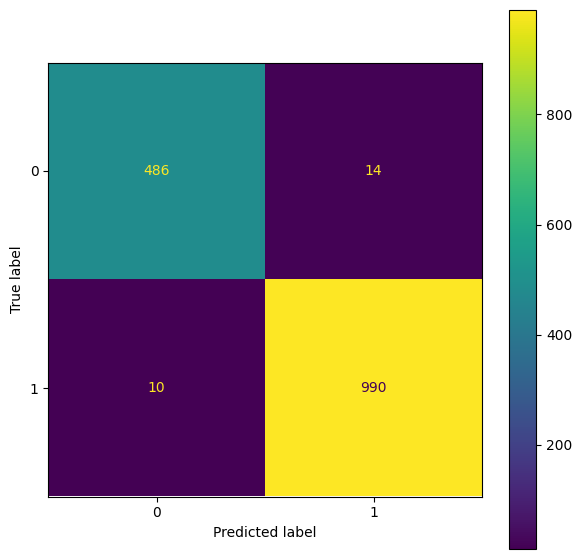

In [229]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(billets_kmeans["is_genuine"],billets_kmeans["cluster"])
cmp = ConfusionMatrixDisplay(cm)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

# REGRESSION LOGISTIQUE



La régression logistique est un modèle statistique utilisé pour prédire une variable binaire en fonction de variables explicatives. Elle est basée sur la fonction logistique qui transforme une combinaison linéaire des variables explicatives en une probabilité de succès pour la variable binaire.

In [230]:
from sklearn.metrics import confusion_matrix

In [231]:
billets_pred['is_genuine'].replace({True: 1, False: 0}, inplace=True)

In [232]:
# Données d'entraînement
X  = billets_pred.drop(columns = "is_genuine")
y = billets_pred['is_genuine']

# Standardisation des données
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X)

In [233]:
X_scaled_1 = pd.DataFrame(X_scaled2, columns=X.columns)
X_scaled_1['is_genuine'] = billets_pred['is_genuine']
X_scaled_1

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,-0.486540,2.774123,3.163240,0.056315,-1.128325,0.173651,1
1,-1.633729,-2.236535,-0.799668,-1.080901,-0.696799,0.471666,1
2,2.397823,1.504756,-1.291191,-0.125640,-0.912562,0.551901,1
3,-1.961498,-0.399294,0.060498,-1.308344,-0.610494,0.953075,1
4,-0.748754,0.836669,-1.414072,-0.671503,1.417677,-0.158750,1
...,...,...,...,...,...,...,...
1495,-0.683201,1.170713,0.767063,-0.095314,-0.265273,-1.602978,0
1496,0.758981,2.005822,1.596509,1.193531,0.942999,-1.958303,0
1497,-0.519316,-0.065250,0.613462,1.557440,0.899846,-0.835016,0
1498,0.332882,0.836669,0.429141,1.041902,1.331372,-0.491152,0


In [234]:
#On split le dataframe pour avoir une partie pour 'train' le model et une partie pour le 'test'

from sklearn.model_selection import train_test_split

y = billets_pred['is_genuine']

X_train1, X_test1 = train_test_split(X_scaled_1, test_size=0.2, random_state=42)

print(np.shape(X_train1) , np.shape(X_test1))

(1200, 7) (300, 7)


In [235]:
X_train1

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
382,1.053972,1.972418,-0.369585,-0.610852,-0.308426,0.666522,1
538,-0.191548,1.571565,-1.321911,-0.610852,-1.430393,0.941613,1
1493,-1.076523,1.003691,2.118753,0.602179,0.856694,-0.594311,0
1112,0.332882,0.836669,1.197146,1.709069,0.511473,-1.224728,0
324,0.463989,1.304330,-0.983989,-0.459223,-1.128325,0.735295,1
...,...,...,...,...,...,...,...
1130,-1.305961,0.870073,0.828504,1.132879,2.064966,0.299734,0
1294,1.447295,0.803264,0.797784,0.662830,0.079947,-1.018409,0
860,-1.895944,-0.666529,0.214099,-0.064988,-0.135816,0.918689,1
1459,-0.584870,0.936882,-0.308144,2.588516,0.425168,-1.763447,0


##STATSMODEL

In [236]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [237]:
reg_log = smf.glm('is_genuine~margin_low+diagonal+height_left+height_right+margin_up+length', data=X_train1, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1193
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.157
Date:                Thu, 13 Jul 2023   Deviance:                       68.314
Time:                        18:58:30   Pearson chi2:                 1.91e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7001
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1403      0.389      5.495   

Un à un on enleve les varaibles avec les plus grandes P-values et supérieur à 5% et on relance l'algorithme;

On commencence par enlever Diagonal , puis Height left

In [238]:
reg_log = smf.glm('is_genuine~margin_low+height_right+margin_up+length', data=X_train1, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1195
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.791
Date:                Thu, 13 Jul 2023   Deviance:                       69.582
Time:                        18:58:30   Pearson chi2:                 2.36e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6998
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1836      0.390      5.600   

In [239]:
# Prédictions avec le dataset test

y_pred = reg_log.predict(X_test1)
ypredround = y_pred.round(1).astype(int)


In [240]:


X_test1["pred"] = ypredround

X_test1

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,pred
1116,0.988419,-0.432698,0.613462,0.768970,1.158762,-1.614440,0,0
1368,-1.010969,0.970286,1.412188,1.769720,0.382015,-0.433841,0,0
422,-1.404291,-1.668661,-0.891828,-0.671503,-0.826257,0.093416,1,1
413,1.119526,-1.234404,-1.291191,-0.583793,0.036795,0.311197,1,1
451,0.693427,-0.800146,-1.168310,-0.626015,-1.603003,0.402894,1,1
...,...,...,...,...,...,...,...,...
983,1.217857,-1.134190,-0.799668,-1.096064,-0.265273,1.125007,1,1
799,1.775063,0.001559,-0.400305,-0.322757,-1.085172,0.047568,1,1
1265,1.348964,1.705183,0.336980,2.027489,1.115609,-1.408122,0,0
1150,-0.552093,2.774123,1.289307,1.375485,-0.049510,0.391431,0,0


### Evaluation du modele / Metrics

In [241]:
# Metrics
accuracy, precision, recall, f1, scores_df =  calculate_scores(X_test1['is_genuine'],X_test1['pred'],"RegLog_Stats")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(scores_df)

Accuracy: 0.98
Precision: 1.0
Recall: 0.9684
F1 Score: 0.984
       Score  Base model   k-means  RegLog_Stats
0   Accuracy      0.9727    0.9840        0.9800
1  Precision      0.9908    0.9861        1.0000
2     Recall      0.9680    0.9900        0.9684
3   F1 Score      0.9793    0.9880        0.9840


### Matrice de confusion

La matrice de confusion est un tableau qui permet d'évaluer les performances d'un modèle de classification en comparant les prédictions du modèle avec les valeurs réelles de la variable cible. Elle récapitule le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs effectués par le modèle.

[ tn, fp,

fn, tp ]

In [242]:
# Matrice de confusion
from sklearn import metrics

cm = metrics.confusion_matrix(X_test1['is_genuine'],X_test1['pred'])
print(cm)


[[110   0]
 [  6 184]]


In [243]:
count = sum(X_test1["is_genuine"])
count2 = sum(X_test1["pred"])

print("Nombre de True réel :", count)

print("Nombre de True avec le modèle :", count2)

Nombre de True réel : 190
Nombre de True avec le modèle : 184


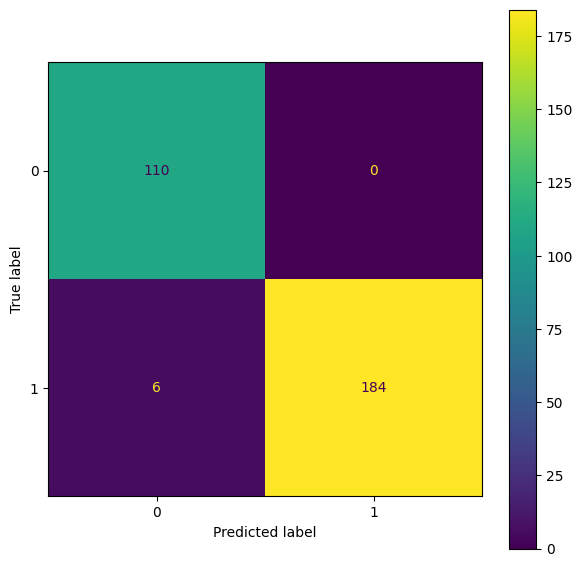

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(X_test1['is_genuine'],X_test1['pred'])
cmp = ConfusionMatrixDisplay(cm)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

##SCIKITLEARN

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
X  = X_scaled_1.drop(columns = "is_genuine")
y = X_scaled_1['is_genuine']


In [247]:
#On split le dataframe pour avoir une partie pour 'train' le model et une partie pour le 'test'

from sklearn.model_selection import train_test_split

"""X = billets_pred.drop('is_genuine', axis=1)
y = billets_pred['is_genuine']"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(np.shape(X_train) , np.shape(X_test))

(1200, 6) (300, 6)


In [248]:
pd.DataFrame(X_train)

,diagonal,height_left,height_right,margin_low,margin_up,length
382,1.053972,1.972418,-0.369585,-0.610852,-0.308426,0.666522
538,-0.191548,1.571565,-1.321911,-0.610852,-1.430393,0.941613
1493,-1.076523,1.003691,2.118753,0.602179,0.856694,-0.594311
1112,0.332882,0.836669,1.197146,1.709069,0.511473,-1.224728
324,0.463989,1.304330,-0.983989,-0.459223,-1.128325,0.735295
...,...,...,...,...,...,...
1130,-1.305961,0.870073,0.828504,1.132879,2.064966,0.299734
1294,1.447295,0.803264,0.797784,0.662830,0.079947,-1.018409
860,-1.895944,-0.666529,0.214099,-0.064988,-0.135816,0.918689
1459,-0.584870,0.936882,-0.308144,2.588516,0.425168,-1.763447


In [249]:
# Création du moèle
reg_log2 = LogisticRegression()

In [250]:
from sklearn.feature_selection import RFECV

select = RFECV(estimator=reg_log2, cv=10)

select.fit(X_train, y_train)

print(f"Optimal number of features: {select.n_features_}")



Optimal number of features: 4


In [251]:

mask = select.get_support()
features = billets_pred.drop('is_genuine', axis = 1).columns.to_numpy()


best_features = features[mask]

print("All features: ", X_train.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(features[mask])

All features:  6
['diagonal' 'height_left' 'height_right' 'margin_low' 'margin_up' 'length']
Selected best:  4
['height_right' 'margin_low' 'margin_up' 'length']


**On supprime les variables 'diagonal' ,'height_left' qui ne font pas partis des meilleurs variables
pour le modèle.**

In [252]:
X_train.drop({'diagonal', 'height_left'}, axis = 1 , inplace = True)

X_test.drop({'diagonal', 'height_left'}, axis = 1 , inplace = True)

In [253]:
reg_log2.fit(X_train, y_train)

LogisticRegression()

In [254]:
y_pred2 = reg_log2.predict(X_test)


In [255]:
y_test

1116    0
1368    0
422     1
413     1
451     1
       ..
983     1
799     1
1265    0
1150    0
824     1
Name: is_genuine, Length: 300, dtype: int64

-------------
### Evaluation du modele / Metrics

In [256]:
accuracy, precision, recall, f1, scores_df =  calculate_scores(y_test,y_pred2,"RegLog_SciKit")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(scores_df)

Accuracy: 0.99
Precision: 0.9845
Recall: 1.0
F1 Score: 0.9922
       Score  Base model   k-means  RegLog_Stats  RegLog_SciKit
0   Accuracy      0.9727    0.9840        0.9800         0.9900
1  Precision      0.9908    0.9861        1.0000         0.9845
2     Recall      0.9680    0.9900        0.9684         1.0000
3   F1 Score      0.9793    0.9880        0.9840         0.9922


------------
### Matrice de confusion

In [257]:
count = sum(y_test)
print("Nombre de True :", count)

Nombre de True : 190


In [258]:
count = sum(y_pred2)
print("Nombre de True :", count)

Nombre de True : 193


''

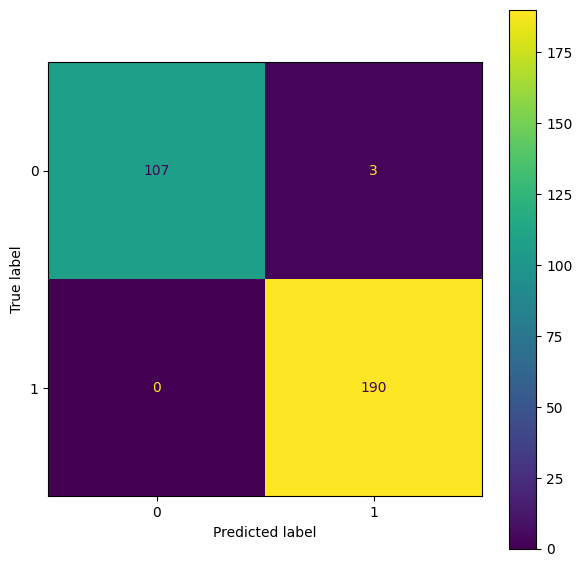

In [259]:
# Matrice de confusion

cm = confusion_matrix(y_test, y_pred2)
cmp = ConfusionMatrixDisplay(cm)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)
;

In [260]:

cm = metrics.confusion_matrix(y_test , y_pred2)
print(cm)

[[107   3]
 [  0 190]]


-----------
# COMPARAISON DES MODELES

## Metrics

La précision est utile lorsque l'accent est mis sur la minimisation des faux positifs, c'est-à-dire lorsque les erreurs de prédiction positives sont coûteuses.

In [261]:
scores_df

,Score,Base model,k-means,RegLog_Stats,RegLog_SciKit
0,Accuracy,0.9727,0.9840,0.9800,0.9900
1,Precision,0.9908,0.9861,1.0000,0.9845
2,Recall,0.9680,0.9900,0.9684,1.0000
3,F1 Score,0.9793,0.9880,0.9840,0.9922


## Courbe ROC

 La courbe ROC représente le taux de vrais positifs par rapport au taux de faux positifs à différents seuils de classification. L'AUC-ROC mesure les performances globales du modèle.

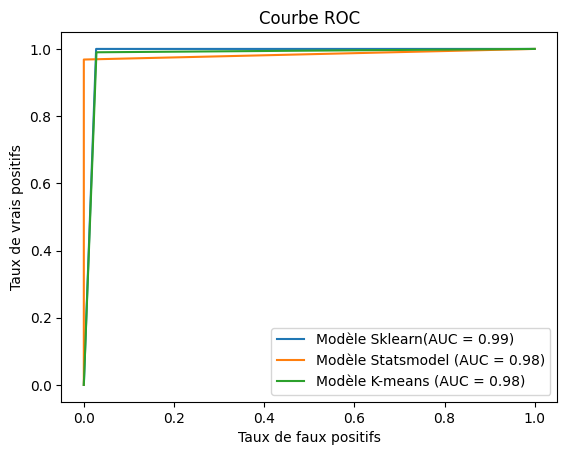

In [262]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred2)
fpr_model2, tpr_model2, _ = roc_curve(X_test1["is_genuine"],X_test1["pred"])
fpr_model3, tpr_model3, _ = roc_curve(billets_kmeans["is_genuine"],billets_kmeans["cluster"])


# Calcul des aires sous la courbe ROC (AUC) pour chaque modèle
auc_model1 = roc_auc_score(y_test, y_pred2)
auc_model2 = roc_auc_score(X_test1["is_genuine"],X_test1["pred"])
auc_model3 = roc_auc_score(billets_kmeans["is_genuine"],billets_kmeans["cluster"])

# Tracé des courbes ROC
plt.plot(fpr_model1, tpr_model1, label='Modèle Sklearn(AUC = %0.2f)' % auc_model1)
plt.plot(fpr_model2, tpr_model2, label='Modèle Statsmodel (AUC = %0.2f)' % auc_model2)
plt.plot(fpr_model3, tpr_model3, label='Modèle K-means (AUC = %0.2f)' % auc_model3)


# Configuration du graphique
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc='lower right')

##Courbe Precision /Recall



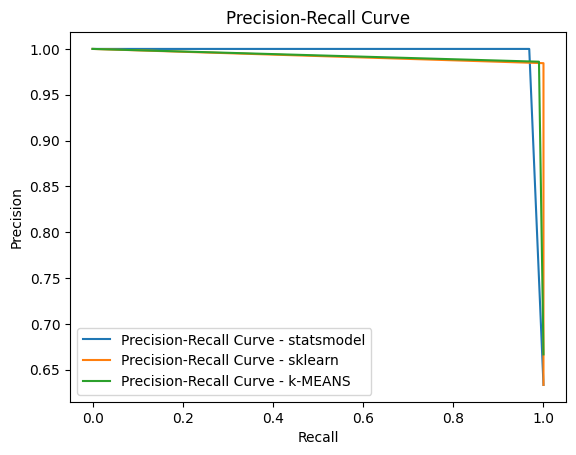

In [263]:
from sklearn.metrics import precision_recall_curve


# Calculez la précision, le rappel et les seuils à différents niveaux de seuil
precision, recall, thresholds = precision_recall_curve(X_test1["is_genuine"], X_test1["pred"])
precision2, recall2, thresholds2 = precision_recall_curve(y_test,y_pred2)
precision3, recall3, thresholds3 = precision_recall_curve(billets_kmeans["is_genuine"],billets_kmeans["cluster"])

# Tracez la courbe de précision-rappel
plt.plot(recall, precision, label='Precision-Recall Curve - statsmodel')
plt.plot(recall2, precision2, label='Precision-Recall Curve - sklearn')
plt.plot(recall3, precision3, label='Precision-Recall Curve - k-MEANS')



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Modele retenu pour determiner si un billet est un vrai ou un faux.



In [264]:

billets_prod = pd.read_csv("billets_production.csv", sep =',')
billets_prod


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [265]:
billets_values = billets_prod.drop(['id', "diagonal",'height_left'], axis=1)

In [266]:
billets_values_scaled = scaler.fit_transform(billets_values)

In [267]:
test = reg_log2.predict(billets_values_scaled)

test

array([0, 0, 0, 1, 1])

In [268]:
billets_prod["pred"] =  test
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,pred
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1


# Algorithme

In [269]:
# Fonction qui permet de prédire si les billets d'un certain dataset sont vrais ou faux
def algo_billet(csv):

    billet_test = pd.read_csv(csv)
    billet_value = billet_test.drop(['id', 'diagonal','height_left'], axis=1)

    billet_value_scaled = scaler.fit_transform(billet_value)


    y_pred = reg_log2.predict(billet_value_scaled)
    proba_true = reg_log2.predict_proba(billet_value_scaled)[:, 1]

    billet_test['Prediction'] = y_pred
    billet_test['Probability_is_true'] = proba_true.round(3)
    billets_predict_rl = billet_test[['id','Prediction','Probability_is_true']].set_index("id")

    return billets_predict_rl


In [270]:
algo_billet("billets_production.csv")

,Prediction,Probability_is_true
id,,
A_1,0,0.050
A_2,0,0.012
A_3,0,0.011
A_4,1,1.000
A_5,1,1.000


In [271]:
algo_billet("billets_test.csv")

FileNotFoundError: ignored